In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
import os

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Preprocessing Functions

In [5]:
# dropping the next date column
def next_date(df):
    return df.drop(columns=['Next_date'], inplace=True)

In [6]:
# converting negative values to null 
def negative_values(df, column):
    df[column] = df[column].apply(lambda x: 0 if x < 0 else x)
    return df

In [7]:
# removing outliers using Inter Quartile Range
def remove_outliers_iqr(df, column):
    # Calculate the first and third quartiles
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)

    # Calculate the interquartile range
    IQR = Q3 - Q1

    # Define the lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Remove outliers from the dataframe
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    
    return df


In [8]:
# filling null values using mean imputation
def mean_imputation(df):
    mean = df['HCHO_emission'].mean()
    df['HCHO_emission'].fillna(mean, inplace=True)

    mean_hcho_emission = df.loc[df['HCHO_emission'] != 0.000000, 'HCHO_emission'].mean()
    df['HCHO_emission'].replace(0.000000, mean_hcho_emission, inplace=True)
    return df

## Column Name Initialization

In [9]:
columns = ['HCHO_emission', 'City', 'Current_date', 'Next_date'] # names of columns in the dataframe

## Colombo, Nuwara Eliya, Matara Dataset

In [10]:
col_mat_nuw = pd.read_csv('City_DS\col_mat_nuw_output.csv')
col_mat_nuw.columns = columns # inserting the column names into the dataframe
col_mat_nuw['Current_date'] = pd.to_datetime(col_mat_nuw['Current_date']) # converting the column to datetime
col_mat_nuw

HCHO_emission                 City Current_date   Next_date
0          0.000263       Colombo Proper   2019-01-02  2019-01-03
1          0.000099       Colombo Proper   2019-01-03  2019-01-04
2          0.000210       Colombo Proper   2019-01-04  2019-01-05
3          0.000179       Colombo Proper   2019-01-05  2019-01-06
4          0.000108       Colombo Proper   2019-01-06  2019-01-07
...             ...                  ...          ...         ...
5472            NaN  Nuwara Eliya Proper   2023-12-27  2023-12-28
5473            NaN  Nuwara Eliya Proper   2023-12-28  2023-12-29
5474            NaN  Nuwara Eliya Proper   2023-12-29  2023-12-30
5475            NaN  Nuwara Eliya Proper   2023-12-30  2023-12-31
5476            NaN  Nuwara Eliya Proper   2023-12-31  2024-01-01

[5477 rows x 4 columns]

In [11]:
col_mat_nuw.loc[col_mat_nuw['City'] == 'Nuwara Eliya Proper', 'City'] = 'Nuwara Eliya'
col_mat_nuw.loc[col_mat_nuw['City'] == 'Colombo Proper', 'City'] = 'Colombo'
col_mat_nuw.loc[col_mat_nuw['City'] == 'Deniyaya, Matara', 'City'] = 'Matara'
col_mat_nuw

HCHO_emission          City Current_date   Next_date
0          0.000263       Colombo   2019-01-02  2019-01-03
1          0.000099       Colombo   2019-01-03  2019-01-04
2          0.000210       Colombo   2019-01-04  2019-01-05
3          0.000179       Colombo   2019-01-05  2019-01-06
4          0.000108       Colombo   2019-01-06  2019-01-07
...             ...           ...          ...         ...
5472            NaN  Nuwara Eliya   2023-12-27  2023-12-28
5473            NaN  Nuwara Eliya   2023-12-28  2023-12-29
5474            NaN  Nuwara Eliya   2023-12-29  2023-12-30
5475            NaN  Nuwara Eliya   2023-12-30  2023-12-31
5476            NaN  Nuwara Eliya   2023-12-31  2024-01-01

[5477 rows x 4 columns]

In [12]:
colombo = col_mat_nuw[col_mat_nuw['City'] == 'Colombo']
nuwara_eliya = col_mat_nuw[col_mat_nuw['City'] == 'Nuwara Eliya']
matara = col_mat_nuw[col_mat_nuw['City'] == 'Matara']

nuwara_eliya.reset_index(drop=True, inplace=True)
matara.reset_index(drop=True, inplace=True)

## Kandy Dataset

In [13]:
kandy = pd.read_csv('City_DS\kan_output.csv')
kandy.columns = columns
kandy['Current_date'] = pd.to_datetime(kandy['Current_date']) # converting the date column to datetime
kandy

HCHO_emission          City Current_date   Next_date
0          0.000092  Kandy Proper   2019-01-02  2019-01-03
1               NaN  Kandy Proper   2019-01-03  2019-01-04
2          0.000191  Kandy Proper   2019-01-04  2019-01-05
3          0.000122  Kandy Proper   2019-01-05  2019-01-06
4         -0.000065  Kandy Proper   2019-01-06  2019-01-07
...             ...           ...          ...         ...
1820            NaN  Kandy Proper   2023-12-27  2023-12-28
1821            NaN  Kandy Proper   2023-12-28  2023-12-29
1822            NaN  Kandy Proper   2023-12-29  2023-12-30
1823       0.000056  Kandy Proper   2023-12-30  2023-12-31
1824            NaN  Kandy Proper   2023-12-31  2024-01-01

[1825 rows x 4 columns]

In [14]:
kandy.loc[kandy['City'] == 'Kandy Proper', 'City'] = 'Kandy'
kandy

HCHO_emission   City Current_date   Next_date
0          0.000092  Kandy   2019-01-02  2019-01-03
1               NaN  Kandy   2019-01-03  2019-01-04
2          0.000191  Kandy   2019-01-04  2019-01-05
3          0.000122  Kandy   2019-01-05  2019-01-06
4         -0.000065  Kandy   2019-01-06  2019-01-07
...             ...    ...          ...         ...
1820            NaN  Kandy   2023-12-27  2023-12-28
1821            NaN  Kandy   2023-12-28  2023-12-29
1822            NaN  Kandy   2023-12-29  2023-12-30
1823       0.000056  Kandy   2023-12-30  2023-12-31
1824            NaN  Kandy   2023-12-31  2024-01-01

[1825 rows x 4 columns]

## Monaragala, Jaffna, Kurunegala Dataset

In [15]:
mon_kur_jaf = pd.read_csv('City_DS\mon_kur_jaf_output.csv')
mon_kur_jaf.columns = columns # inserting the column names into the dataframe
mon_kur_jaf['Current_date'] = pd.to_datetime(mon_kur_jaf['Current_date']) # converting the column to datetime
mon_kur_jaf

HCHO_emission                City Current_date   Next_date
0          0.000019  Bibile, Monaragala   2019-01-02  2019-01-03
1          0.000028  Bibile, Monaragala   2019-01-03  2019-01-04
2          0.000037  Bibile, Monaragala   2019-01-04  2019-01-05
3         -0.000018  Bibile, Monaragala   2019-01-05  2019-01-06
4          0.000146  Bibile, Monaragala   2019-01-06  2019-01-07
...             ...                 ...          ...         ...
5472            NaN       Jaffna Proper   2023-12-27  2023-12-28
5473       0.000051       Jaffna Proper   2023-12-28  2023-12-29
5474       0.000127       Jaffna Proper   2023-12-29  2023-12-30
5475       0.000117       Jaffna Proper   2023-12-30  2023-12-31
5476       0.000065       Jaffna Proper   2023-12-31  2024-01-01

[5477 rows x 4 columns]

In [16]:
mon_kur_jaf.loc[mon_kur_jaf['City'] == 'Bibile, Monaragala', 'City'] = 'Monaragala'
mon_kur_jaf.loc[mon_kur_jaf['City'] == 'Jaffna Proper', 'City'] = 'Jaffna'
mon_kur_jaf.loc[mon_kur_jaf['City'] == 'Kurunegala Proper', 'City'] = 'Kurunegala'
mon_kur_jaf

HCHO_emission        City Current_date   Next_date
0          0.000019  Monaragala   2019-01-02  2019-01-03
1          0.000028  Monaragala   2019-01-03  2019-01-04
2          0.000037  Monaragala   2019-01-04  2019-01-05
3         -0.000018  Monaragala   2019-01-05  2019-01-06
4          0.000146  Monaragala   2019-01-06  2019-01-07
...             ...         ...          ...         ...
5472            NaN      Jaffna   2023-12-27  2023-12-28
5473       0.000051      Jaffna   2023-12-28  2023-12-29
5474       0.000127      Jaffna   2023-12-29  2023-12-30
5475       0.000117      Jaffna   2023-12-30  2023-12-31
5476       0.000065      Jaffna   2023-12-31  2024-01-01

[5477 rows x 4 columns]

In [17]:
monaragala = mon_kur_jaf[mon_kur_jaf['City'] == 'Monaragala']
jaffna = mon_kur_jaf[mon_kur_jaf['City'] == 'Jaffna']
kurunegala = mon_kur_jaf[mon_kur_jaf['City'] == 'Kurunegala']

jaffna.reset_index(drop=True, inplace=True)
kurunegala.reset_index(drop=True, inplace=True)

## Colombo

In [18]:
next_date(colombo)

In [19]:
colombo = negative_values(colombo, 'HCHO_emission')
colombo

HCHO_emission     City Current_date
0          0.000263  Colombo   2019-01-02
1          0.000099  Colombo   2019-01-03
2          0.000210  Colombo   2019-01-04
3          0.000179  Colombo   2019-01-05
4          0.000108  Colombo   2019-01-06
...             ...      ...          ...
1820       0.000118  Colombo   2023-12-27
1821            NaN  Colombo   2023-12-28
1822            NaN  Colombo   2023-12-29
1823       0.000140  Colombo   2023-12-30
1824       0.000080  Colombo   2023-12-31

[1825 rows x 3 columns]

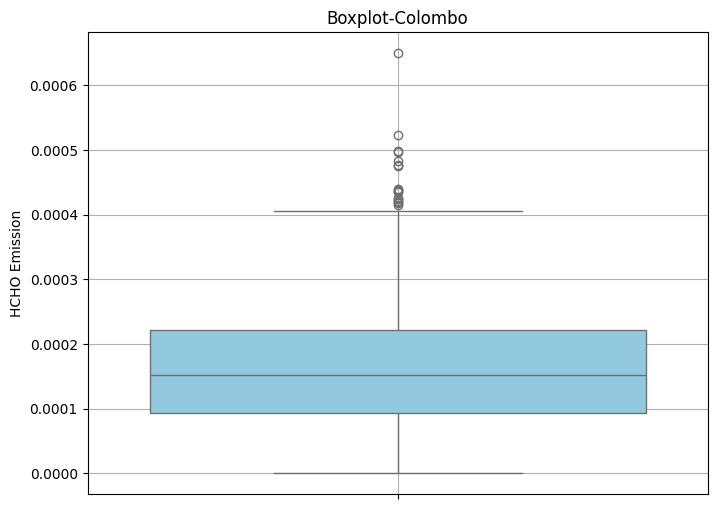

In [20]:
# drawing a box plot to see for outliers
plt.figure(figsize=(8,6))
sns.boxplot(data=colombo, y='HCHO_emission', color='skyblue')
plt.title("Boxplot-Colombo")
plt.ylabel("HCHO Emission")
plt.grid(True)
plt.show()

In [21]:
colombo = remove_outliers_iqr(colombo, 'HCHO_emission')
colombo

HCHO_emission     City Current_date
0          0.000263  Colombo   2019-01-02
1          0.000099  Colombo   2019-01-03
2          0.000210  Colombo   2019-01-04
3          0.000179  Colombo   2019-01-05
4          0.000108  Colombo   2019-01-06
...             ...      ...          ...
1817       0.000182  Colombo   2023-12-24
1818       0.000343  Colombo   2023-12-25
1820       0.000118  Colombo   2023-12-27
1823       0.000140  Colombo   2023-12-30
1824       0.000080  Colombo   2023-12-31

[1321 rows x 3 columns]

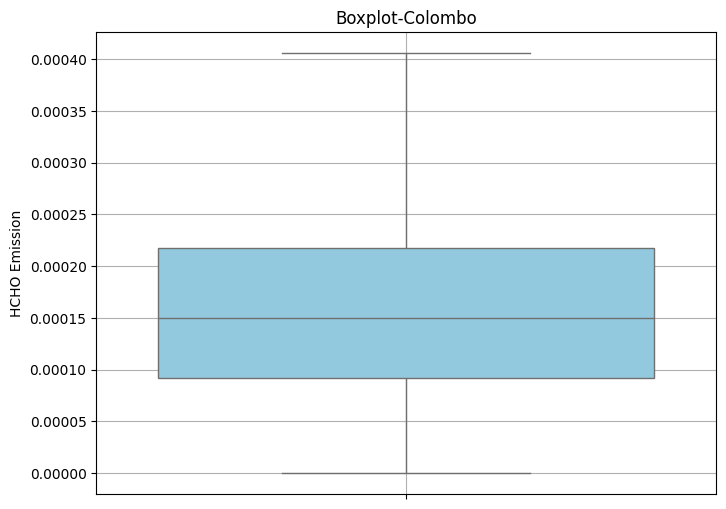

In [22]:
# drawing a box plot to see for outliers
plt.figure(figsize=(8,6))
sns.boxplot(data=colombo, y='HCHO_emission', color='skyblue')
plt.title("Boxplot-Colombo")
plt.ylabel("HCHO Emission")
plt.grid(True)
plt.show()

In [23]:
mean_imputation(colombo)
colombo

HCHO_emission     City Current_date
0          0.000263  Colombo   2019-01-02
1          0.000099  Colombo   2019-01-03
2          0.000210  Colombo   2019-01-04
3          0.000179  Colombo   2019-01-05
4          0.000108  Colombo   2019-01-06
...             ...      ...          ...
1817       0.000182  Colombo   2023-12-24
1818       0.000343  Colombo   2023-12-25
1820       0.000118  Colombo   2023-12-27
1823       0.000140  Colombo   2023-12-30
1824       0.000080  Colombo   2023-12-31

[1321 rows x 3 columns]

In [24]:
colombo.isnull().sum()

HCHO_emission    0
City             0
Current_date     0
dtype: int64

In [25]:
folder = 'Preprocessed-Data'

if not os.path.exists(folder):
    os.makedirs(folder)

colombo.to_csv('Preprocessed-Data/colombo.csv', index=False)

## Nuwara Eliya

In [26]:
next_date(nuwara_eliya)

In [27]:
nuwara_eliya = negative_values(nuwara_eliya, 'HCHO_emission')
nuwara_eliya

HCHO_emission          City Current_date
0               NaN  Nuwara Eliya   2019-01-01
1               NaN  Nuwara Eliya   2019-01-02
2          0.000191  Nuwara Eliya   2019-01-03
3          0.000051  Nuwara Eliya   2019-01-04
4          0.000065  Nuwara Eliya   2019-01-05
...             ...           ...          ...
1821            NaN  Nuwara Eliya   2023-12-27
1822            NaN  Nuwara Eliya   2023-12-28
1823            NaN  Nuwara Eliya   2023-12-29
1824            NaN  Nuwara Eliya   2023-12-30
1825            NaN  Nuwara Eliya   2023-12-31

[1826 rows x 3 columns]

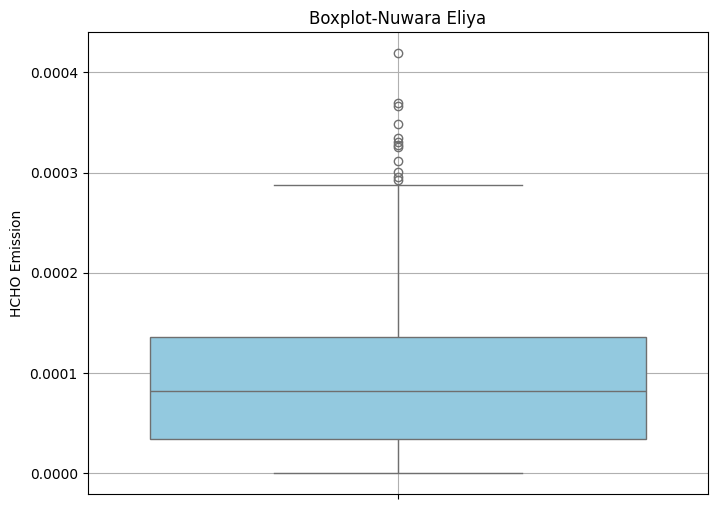

In [28]:
# drawing a box plot to see for outliers
plt.figure(figsize=(8,6))
sns.boxplot(data=nuwara_eliya, y='HCHO_emission', color='skyblue')
plt.title("Boxplot-Nuwara Eliya")
plt.ylabel("HCHO Emission")
plt.grid(True)
plt.show()

In [29]:
nuwara_eliya = remove_outliers_iqr(nuwara_eliya, 'HCHO_emission')
nuwara_eliya

HCHO_emission          City Current_date
2          0.000191  Nuwara Eliya   2019-01-03
3          0.000051  Nuwara Eliya   2019-01-04
4          0.000065  Nuwara Eliya   2019-01-05
5          0.000090  Nuwara Eliya   2019-01-06
6          0.000041  Nuwara Eliya   2019-01-07
...             ...           ...          ...
1787       0.000036  Nuwara Eliya   2023-11-23
1804       0.000000  Nuwara Eliya   2023-12-10
1807       0.000108  Nuwara Eliya   2023-12-13
1811       0.000006  Nuwara Eliya   2023-12-17
1817       0.000237  Nuwara Eliya   2023-12-23

[729 rows x 3 columns]

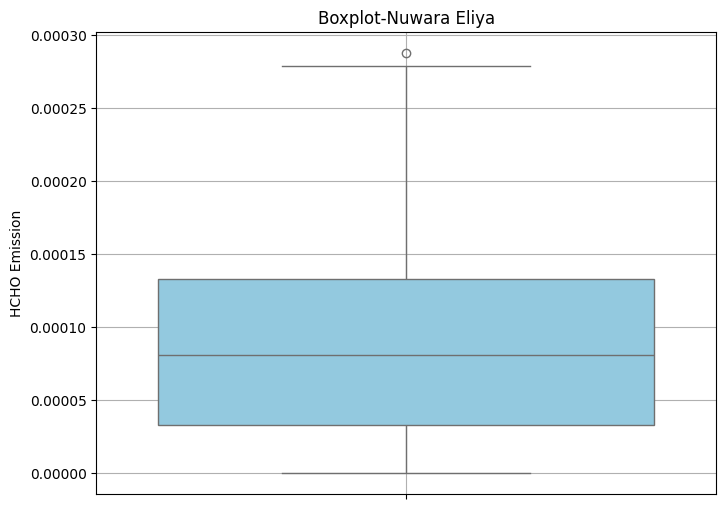

In [30]:
# drawing a box plot to see for outliers
plt.figure(figsize=(8,6))
sns.boxplot(data=nuwara_eliya, y='HCHO_emission', color='skyblue')
plt.title("Boxplot-Nuwara Eliya")
plt.ylabel("HCHO Emission")
plt.grid(True)
plt.show()

In [31]:
mean_imputation(nuwara_eliya)
nuwara_eliya

HCHO_emission          City Current_date
2          0.000191  Nuwara Eliya   2019-01-03
3          0.000051  Nuwara Eliya   2019-01-04
4          0.000065  Nuwara Eliya   2019-01-05
5          0.000090  Nuwara Eliya   2019-01-06
6          0.000041  Nuwara Eliya   2019-01-07
...             ...           ...          ...
1787       0.000036  Nuwara Eliya   2023-11-23
1804       0.000103  Nuwara Eliya   2023-12-10
1807       0.000108  Nuwara Eliya   2023-12-13
1811       0.000006  Nuwara Eliya   2023-12-17
1817       0.000237  Nuwara Eliya   2023-12-23

[729 rows x 3 columns]

In [32]:
nuwara_eliya.isnull().sum()

HCHO_emission    0
City             0
Current_date     0
dtype: int64

In [33]:
folder = 'Preprocessed-Data'

if not os.path.exists(folder):
    os.makedirs(folder)

nuwara_eliya.to_csv('Preprocessed-Data/nuwaraeliya.csv', index=False)

## Matara

In [34]:
next_date(matara)

In [36]:
matara = negative_values(matara, 'HCHO_emission')
matara

HCHO_emission    City Current_date
0               NaN  Matara   2019-01-01
1          0.000006  Matara   2019-01-02
2          0.000236  Matara   2019-01-03
3          0.000064  Matara   2019-01-04
4          0.000053  Matara   2019-01-05
...             ...     ...          ...
1821       0.000228  Matara   2023-12-27
1822            NaN  Matara   2023-12-28
1823            NaN  Matara   2023-12-29
1824       0.000116  Matara   2023-12-30
1825            NaN  Matara   2023-12-31

[1826 rows x 3 columns]

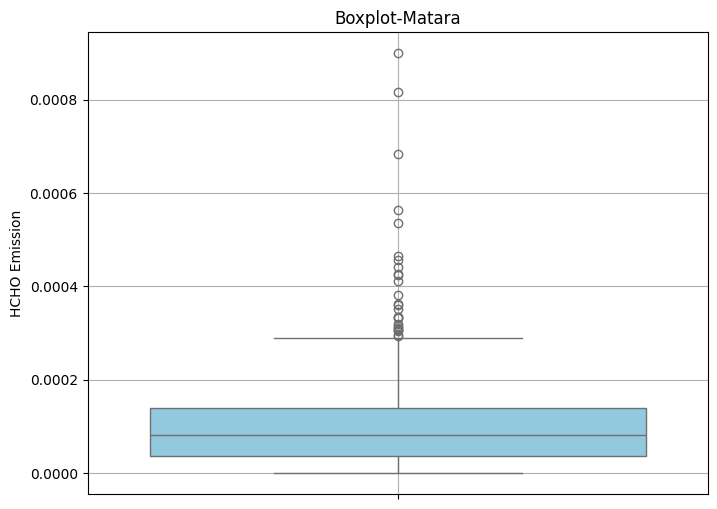

In [37]:
# drawing a box plot to see for outliers
plt.figure(figsize=(8,6))
sns.boxplot(data=matara, y='HCHO_emission', color='skyblue')
plt.title("Boxplot-Matara")
plt.ylabel("HCHO Emission")
plt.grid(True)
plt.show()

In [38]:
matara = remove_outliers_iqr(matara, 'HCHO_emission')
matara

HCHO_emission    City Current_date
1          0.000006  Matara   2019-01-02
2          0.000236  Matara   2019-01-03
3          0.000064  Matara   2019-01-04
4          0.000053  Matara   2019-01-05
5          0.000132  Matara   2019-01-06
...             ...     ...          ...
1818       0.000063  Matara   2023-12-24
1819       0.000072  Matara   2023-12-25
1820       0.000059  Matara   2023-12-26
1821       0.000228  Matara   2023-12-27
1824       0.000116  Matara   2023-12-30

[953 rows x 3 columns]

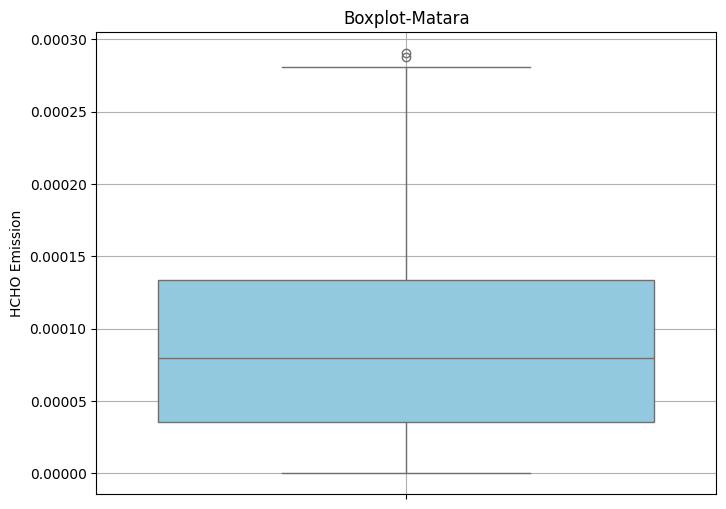

In [39]:
# drawing a box plot to see for outliers
plt.figure(figsize=(8,6))
sns.boxplot(data=matara, y='HCHO_emission', color='skyblue')
plt.title("Boxplot-Matara")
plt.ylabel("HCHO Emission")
plt.grid(True)
plt.show()

In [40]:
mean_imputation(matara)

HCHO_emission    City Current_date
1          0.000006  Matara   2019-01-02
2          0.000236  Matara   2019-01-03
3          0.000064  Matara   2019-01-04
4          0.000053  Matara   2019-01-05
5          0.000132  Matara   2019-01-06
...             ...     ...          ...
1818       0.000063  Matara   2023-12-24
1819       0.000072  Matara   2023-12-25
1820       0.000059  Matara   2023-12-26
1821       0.000228  Matara   2023-12-27
1824       0.000116  Matara   2023-12-30

[953 rows x 3 columns]

In [41]:
matara.isnull().sum()

HCHO_emission    0
City             0
Current_date     0
dtype: int64

In [42]:
folder = 'Preprocessed-Data'

if not os.path.exists(folder):
    os.makedirs(folder)

matara.to_csv('Preprocessed-Data/matara.csv', index=False)

## Kandy

In [43]:
next_date(kandy)

In [44]:
kandy = negative_values(kandy, 'HCHO_emission')
kandy

HCHO_emission   City Current_date
0          0.000092  Kandy   2019-01-02
1               NaN  Kandy   2019-01-03
2          0.000191  Kandy   2019-01-04
3          0.000122  Kandy   2019-01-05
4          0.000000  Kandy   2019-01-06
...             ...    ...          ...
1820            NaN  Kandy   2023-12-27
1821            NaN  Kandy   2023-12-28
1822            NaN  Kandy   2023-12-29
1823       0.000056  Kandy   2023-12-30
1824            NaN  Kandy   2023-12-31

[1825 rows x 3 columns]

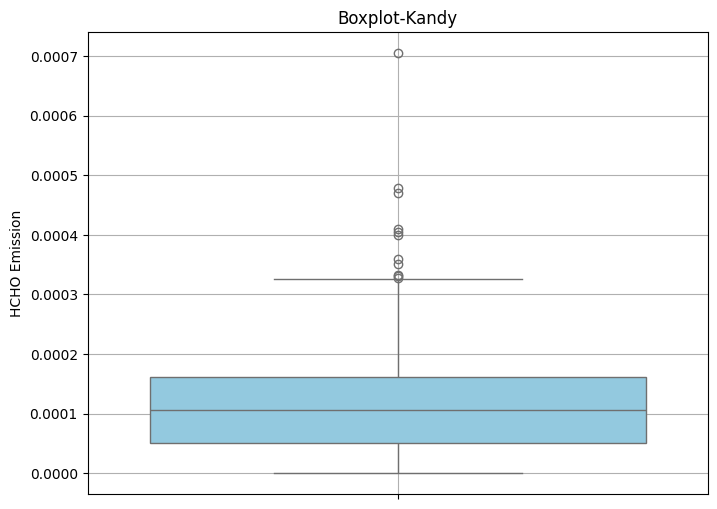

In [45]:
# drawing a box plot to see for outliers
plt.figure(figsize=(8,6))
sns.boxplot(data=kandy, y='HCHO_emission', color='skyblue')
plt.title("Boxplot-Kandy")
plt.ylabel("HCHO Emission")
plt.grid(True)
plt.show()

In [46]:
kandy = remove_outliers_iqr(kandy, 'HCHO_emission')
kandy

HCHO_emission   City Current_date
0          0.000092  Kandy   2019-01-02
2          0.000191  Kandy   2019-01-04
3          0.000122  Kandy   2019-01-05
4          0.000000  Kandy   2019-01-06
5          0.000163  Kandy   2019-01-07
...             ...    ...          ...
1810       0.000000  Kandy   2023-12-17
1814       0.000114  Kandy   2023-12-21
1815       0.000000  Kandy   2023-12-22
1816       0.000116  Kandy   2023-12-23
1823       0.000056  Kandy   2023-12-30

[1021 rows x 3 columns]

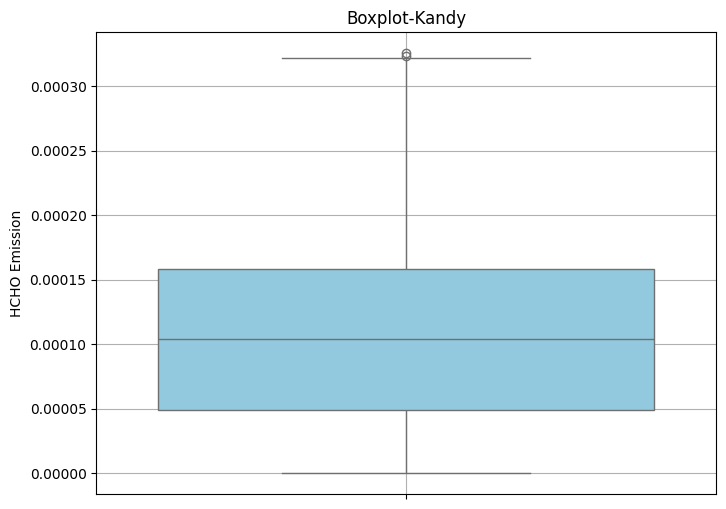

In [47]:
# drawing a box plot to see for outliers
plt.figure(figsize=(8,6))
sns.boxplot(data=kandy, y='HCHO_emission', color='skyblue')
plt.title("Boxplot-Kandy")
plt.ylabel("HCHO Emission")
plt.grid(True)
plt.show()

In [48]:
kandy

HCHO_emission   City Current_date
0          0.000092  Kandy   2019-01-02
2          0.000191  Kandy   2019-01-04
3          0.000122  Kandy   2019-01-05
4          0.000000  Kandy   2019-01-06
5          0.000163  Kandy   2019-01-07
...             ...    ...          ...
1810       0.000000  Kandy   2023-12-17
1814       0.000114  Kandy   2023-12-21
1815       0.000000  Kandy   2023-12-22
1816       0.000116  Kandy   2023-12-23
1823       0.000056  Kandy   2023-12-30

[1021 rows x 3 columns]

In [49]:

mean_imputation(kandy)

HCHO_emission   City Current_date
0          0.000092  Kandy   2019-01-02
2          0.000191  Kandy   2019-01-04
3          0.000122  Kandy   2019-01-05
4          0.000121  Kandy   2019-01-06
5          0.000163  Kandy   2019-01-07
...             ...    ...          ...
1810       0.000121  Kandy   2023-12-17
1814       0.000114  Kandy   2023-12-21
1815       0.000121  Kandy   2023-12-22
1816       0.000116  Kandy   2023-12-23
1823       0.000056  Kandy   2023-12-30

[1021 rows x 3 columns]

In [50]:
kandy.isnull().sum()

HCHO_emission    0
City             0
Current_date     0
dtype: int64

In [51]:
folder = 'Preprocessed-Data'

if not os.path.exists(folder):
    os.makedirs(folder)

kandy.to_csv('Preprocessed-Data/kandy.csv', index=False)

## Monaragala

In [52]:
next_date(monaragala)

In [53]:
monaragala = negative_values(monaragala, 'HCHO_emission')
monaragala

HCHO_emission        City Current_date
0          0.000019  Monaragala   2019-01-02
1          0.000028  Monaragala   2019-01-03
2          0.000037  Monaragala   2019-01-04
3          0.000000  Monaragala   2019-01-05
4          0.000146  Monaragala   2019-01-06
...             ...         ...          ...
1820            NaN  Monaragala   2023-12-27
1821            NaN  Monaragala   2023-12-28
1822            NaN  Monaragala   2023-12-29
1823            NaN  Monaragala   2023-12-30
1824            NaN  Monaragala   2023-12-31

[1825 rows x 3 columns]

In [54]:
# drawing a box plot to see for outliers
plt.figure(figsize=(8,6))
sns.boxplot(data=monaragala, y='HCHO_emission', color='skyblue')
plt.title("Boxplot-Monaragala")
plt.ylabel("HCHO Emission")
plt.grid(True)
plt.show()

In [55]:
monaragala = remove_outliers_iqr(monaragala, 'HCHO_emission')
monaragala

HCHO_emission        City Current_date
0          0.000019  Monaragala   2019-01-02
1          0.000028  Monaragala   2019-01-03
2          0.000037  Monaragala   2019-01-04
3          0.000000  Monaragala   2019-01-05
4          0.000146  Monaragala   2019-01-06
...             ...         ...          ...
1811       0.000052  Monaragala   2023-12-18
1813       0.000000  Monaragala   2023-12-20
1814       0.000000  Monaragala   2023-12-21
1816       0.000149  Monaragala   2023-12-23
1818       0.000031  Monaragala   2023-12-25

[1114 rows x 3 columns]

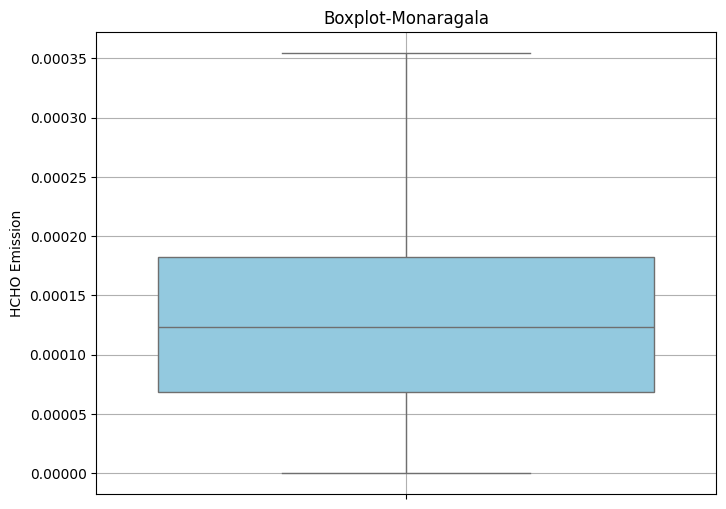

In [56]:
# drawing a box plot to see for outliers
plt.figure(figsize=(8,6))
sns.boxplot(data=monaragala, y='HCHO_emission', color='skyblue')
plt.title("Boxplot-Monaragala")
plt.ylabel("HCHO Emission")
plt.grid(True)
plt.show()

In [57]:
mean_imputation(monaragala)
monaragala

HCHO_emission        City Current_date
0          0.000019  Monaragala   2019-01-02
1          0.000028  Monaragala   2019-01-03
2          0.000037  Monaragala   2019-01-04
3          0.000136  Monaragala   2019-01-05
4          0.000146  Monaragala   2019-01-06
...             ...         ...          ...
1811       0.000052  Monaragala   2023-12-18
1813       0.000136  Monaragala   2023-12-20
1814       0.000136  Monaragala   2023-12-21
1816       0.000149  Monaragala   2023-12-23
1818       0.000031  Monaragala   2023-12-25

[1114 rows x 3 columns]

In [58]:
monaragala.isnull().sum()

HCHO_emission    0
City             0
Current_date     0
dtype: int64

In [59]:
folder = 'Preprocessed-Data'

if not os.path.exists(folder):
    os.makedirs(folder)

monaragala.to_csv('Preprocessed-Data/monaragala.csv', index=False)

## Jaffna

In [60]:
next_date(jaffna)

In [61]:
jaffna = negative_values(jaffna, 'HCHO_emission')
jaffna

HCHO_emission    City Current_date
0          0.000058  Jaffna   2019-01-01
1          0.000102  Jaffna   2019-01-02
2          0.000039  Jaffna   2019-01-03
3          0.000000  Jaffna   2019-01-04
4          0.000159  Jaffna   2019-01-05
...             ...     ...          ...
1821            NaN  Jaffna   2023-12-27
1822       0.000051  Jaffna   2023-12-28
1823       0.000127  Jaffna   2023-12-29
1824       0.000117  Jaffna   2023-12-30
1825       0.000065  Jaffna   2023-12-31

[1826 rows x 3 columns]

In [62]:
# drawing a box plot to see for outliers
plt.figure(figsize=(8,6))
sns.boxplot(data=jaffna, y='HCHO_emission', color='skyblue')
plt.title("Boxplot-Jaffna")
plt.ylabel("HCHO Emission")
plt.grid(True)
plt.show()

In [63]:
jaffna = remove_outliers_iqr(jaffna, 'HCHO_emission')

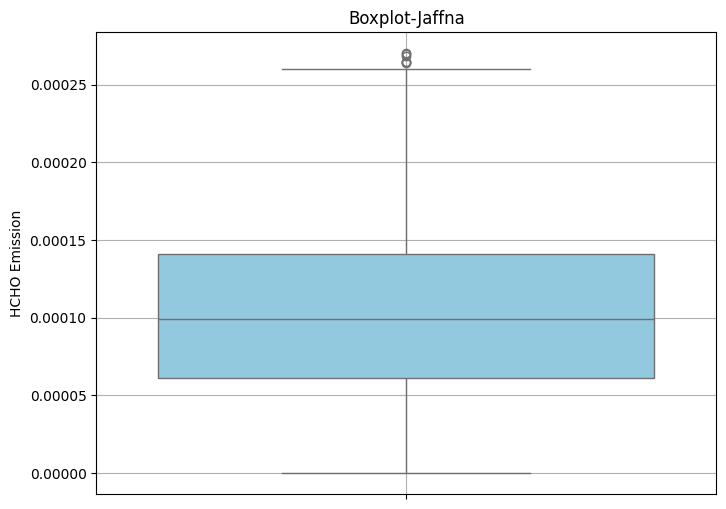

In [64]:
# drawing a box plot to see for outliers
plt.figure(figsize=(8,6))
sns.boxplot(data=jaffna, y='HCHO_emission', color='skyblue')
plt.title("Boxplot-Jaffna")
plt.ylabel("HCHO Emission")
plt.grid(True)
plt.show()

In [65]:
mean_imputation(jaffna)
jaffna

HCHO_emission    City Current_date
0          0.000058  Jaffna   2019-01-01
1          0.000102  Jaffna   2019-01-02
2          0.000039  Jaffna   2019-01-03
3          0.000108  Jaffna   2019-01-04
4          0.000159  Jaffna   2019-01-05
...             ...     ...          ...
1820       0.000108  Jaffna   2023-12-26
1822       0.000051  Jaffna   2023-12-28
1823       0.000127  Jaffna   2023-12-29
1824       0.000117  Jaffna   2023-12-30
1825       0.000065  Jaffna   2023-12-31

[1420 rows x 3 columns]

In [66]:
jaffna.isnull().sum()

HCHO_emission    0
City             0
Current_date     0
dtype: int64

In [67]:
if not os.path.exists(folder):
    os.makedirs(folder)

jaffna.to_csv('Preprocessed-Data/jaffna.csv', index=False)

## Kurunegala

In [68]:
next_date(kurunegala)

In [69]:
kurunegala = negative_values(kurunegala, 'HCHO_emission')
kurunegala

HCHO_emission        City Current_date
0          0.000088  Kurunegala   2019-01-01
1          0.000137  Kurunegala   2019-01-02
2          0.000148  Kurunegala   2019-01-03
3          0.000000  Kurunegala   2019-01-04
4          0.000249  Kurunegala   2019-01-05
...             ...         ...          ...
1821       0.000075  Kurunegala   2023-12-27
1822            NaN  Kurunegala   2023-12-28
1823            NaN  Kurunegala   2023-12-29
1824       0.000158  Kurunegala   2023-12-30
1825            NaN  Kurunegala   2023-12-31

[1826 rows x 3 columns]

In [70]:
# drawing a box plot to see for outliers
plt.figure(figsize=(8,6))
sns.boxplot(data=kurunegala, y='HCHO_emission', color='skyblue')
plt.title("Boxplot-Kurunegala")
plt.ylabel("HCHO Emission")
plt.grid(True)
plt.show()

In [71]:
kurunegala = remove_outliers_iqr(kurunegala, 'HCHO_emission')

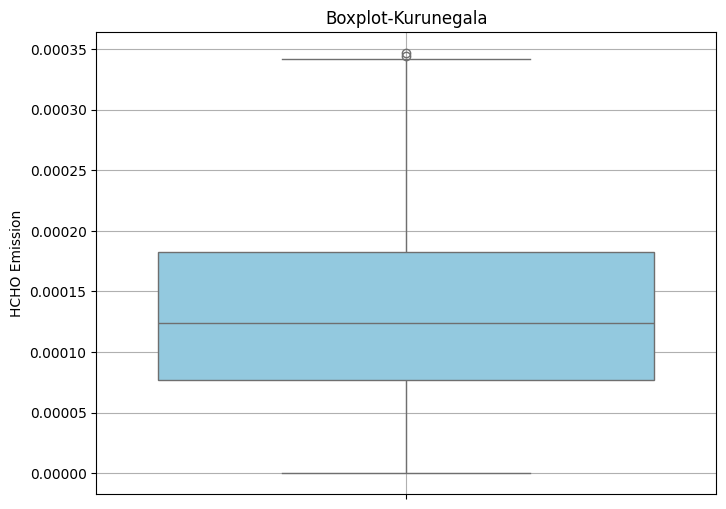

In [72]:
# drawing a box plot to see for outliers
plt.figure(figsize=(8,6))
sns.boxplot(data=kurunegala, y='HCHO_emission', color='skyblue')
plt.title("Boxplot-Kurunegala")
plt.ylabel("HCHO Emission")
plt.grid(True)
plt.show()

In [73]:
mean_imputation(kurunegala)

HCHO_emission        City Current_date
0          0.000088  Kurunegala   2019-01-01
1          0.000137  Kurunegala   2019-01-02
2          0.000148  Kurunegala   2019-01-03
3          0.000138  Kurunegala   2019-01-04
4          0.000249  Kurunegala   2019-01-05
...             ...         ...          ...
1817       0.000063  Kurunegala   2023-12-23
1819       0.000094  Kurunegala   2023-12-25
1820       0.000152  Kurunegala   2023-12-26
1821       0.000075  Kurunegala   2023-12-27
1824       0.000158  Kurunegala   2023-12-30

[1213 rows x 3 columns]

In [74]:
kurunegala.isnull().sum()

HCHO_emission    0
City             0
Current_date     0
dtype: int64

In [75]:
folder = 'Preprocessed-Data'

if not os.path.exists(folder):
    os.makedirs(folder)

kurunegala.to_csv('Preprocessed-Data/kurunegala.csv', index=False)